In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets


### Daniel Alejandro Osuna Garzón

# Regresión lineal 

La regresión lineal es el modelo lineal más simple pero no menos importante, este sirve para medir el grado de relación que tienen dos o más variables generalmente con el objetivo de poder estimar los valores una variable que recibe el nombre de variable respuesta o variable dependiente.

Por ejemplo, para una empresa pude interesarle saber cuánto serán sus ventas si invierte cierta cantidad de dinero en publicidad y para esto puede utilizar la información de meses anteriores para así entrenar un modelo de regresión y saber cuánto debería invertir el siguiente mes  

A pesar de que cuando hablamos de modelo de regresión lineal estamos haciendo referencia a un modelo matemático $Y=\beta_0 +\beta_1X+\varepsilon$ no necesariamente las variables tienen que ser cuantitativas, existen modelos que admiten tener variables de tipo categórico tanto en las variables respuesta como en las explicativas


## Historia

El término de Regresión fue acuñado por Francis Galton en el siglo XIX, sin embargo, los primeros pasos en regresión fueron dados por Legendre en 1805 y unos años más tarde por Gauss, el primer método que se aplicó fue el de estimación por mínimos cuadrados, hoy en día a pesar de que existe una gran variedad de métodos de estimación, el de mínimos cuadrados sigue siendo ampliamente usado.

El análisis de regresión es algo que día a día se sigue desarrollando y a pesar de que cada vez existen nuevas metodologías, el modelo de regresión que sirve para el estudio que se realizando depende únicamente de los datos, es decir uno no ajusta los datos a los modelos, sino que se debe encontrar el modelo que mejor se ajuste a los datos.


In [8]:
Image(url= "https://annalyzin.files.wordpress.com/2016/01/regression-residual-simulation-tutorial2.gif?w=561&h=842")

### Ejemplo


En el siguiente ejmplo se usara la data Iris para predecir el tamaño del petalo apartir del tamaño del sepalo.

Para esto se plantea el siguiente modelo de regresion lineal:
$$ Y=\beta_0 +\beta_1X_1+\varepsilon $$


donde $Y$ representa el tamaño del petalo y $X_1$ el tamaño del sepalo


In [61]:

# carga Iris dataset
iris = datasets.load_iris()
# Arreglo dataset
iris_data = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_target = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([iris_data, iris_target], axis=1)
# Especies
iris_df['species_name'] = np.where(iris_df['species'] == 0, 'Setosa', None)
iris_df['species_name'] = np.where(iris_df['species'] == 1, 'Versicolor', iris_df['species_name'])
iris_df['species_name'] = np.where(iris_df['species'] == 2, 'Virginica', iris_df['species_name'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


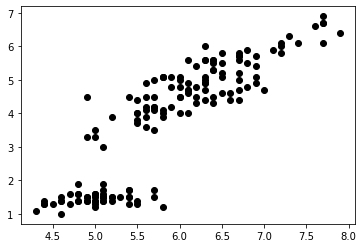

In [77]:
X = iris_df['sepal_length']
y = iris_df['petal_length']
plt.plot(X, y, 'o', color='black');

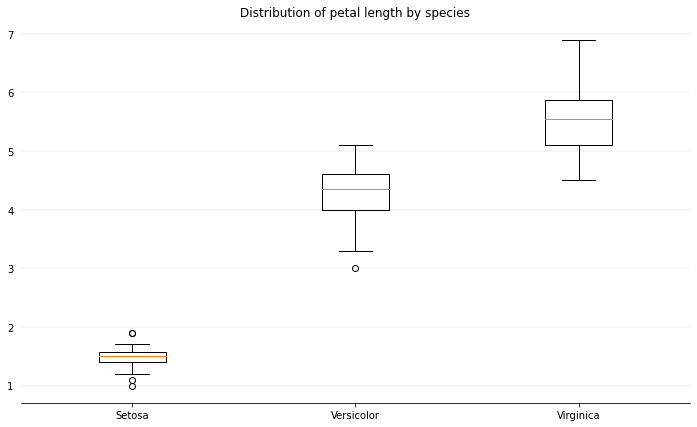

In [75]:
# Vizualizar el largo del petalo para todas las especies
fig, ax = plt.subplots(figsize=(12, 7))
#
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#
ax.yaxis.set_ticks_position('none')
# 
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of petal length by species')
# Ajuste de los nombres de las  especies
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]
labels = iris_df['species_name'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

In [69]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    
   
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('Median: %s' % median)
    print('Setosa estadisticas descriptivas')
print('\n\nSetosa estadisticas descriptivas')
get_summary_statistics(setosa_petal_length)
print('\n\nVersicolor estadisticas descriptivas')
get_summary_statistics(versicolor_petal_length)
print('\n\nVirginica estadisticas descriptivas')
get_summary_statistics(virginica_petal_length)




Setosa estadisticas descriptivas
Min: 1.0
Mean: 1.46
Max: 1.9
Median: 1.5
Setosa estadisticas descriptivas


Versicolor estadisticas descriptivas
Min: 3.0
Mean: 4.26
Max: 5.1
Median: 4.35
Setosa estadisticas descriptivas


Virginica estadisticas descriptivas
Min: 4.5
Mean: 5.55
Max: 6.9
Median: 5.55
Setosa estadisticas descriptivas


In [74]:
# División de los datos en train y test
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [71]:
#Creacion del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     324.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.09e-35
Time:                        21:50:40   Log-Likelihood:                -158.67
No. Observations:                 120   AIC:                             321.3
Df Residuals:                     118   BIC:                             326.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0432      0.603    -11.672      0.0

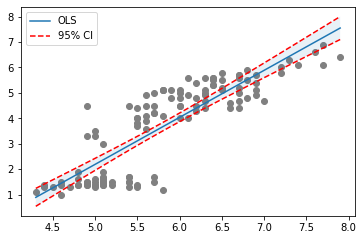

In [73]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

# Conclusiones
1. El modelo presenta un ajuste considerablemente bueno pues el $R2$ ajustado es mayor de 0.7, adicionalmente se observa que tanto el interceprto como el tamaño del sepalo son significativos en el modelo.
2. Seria interesante incluir en el modelo la variable de3 especie y con esto lograr un ajuste mucho mejor

#  Referencias
1.  [wikipedia](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n)
2. [Gráficos ](https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)
3. [Modelo ](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html)
